# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:
# Carregando bibliotecas
import plotly.express as px
from plotly import graph_objects
import yfinance as yf

import pandas as pd
import numpy as np

from plotly import graph_objects
from plotly.graph_objs import Layout

#### 1. Carregue os dados da tarefa anterior

In [15]:
# Carregue os dados da tarefa anterior
df = pd.read_csv('dados_bancos_br_3_anos.csv', index_col = 0, header = [0,1])
print(df.shape)
df.head()

(748, 24)


Price       Adj Close                                      Close             \
Ticker       BBDC4.SA  BCSA34.SA   ITUB3.SA     ^BVSP   BBDC4.SA  BCSA34.SA   
Date                                                                          
2021-06-24  21.004618  17.984446  23.750540  129514.0  24.763636  19.920000   
2021-06-25  20.349192  18.201128  23.117977  127256.0  23.990910  20.160000   
2021-06-28  20.248947  17.605255  22.864950  127429.0  23.872726  19.500000   
2021-06-29  20.125574  17.424690  22.704702  127327.0  23.727272  19.299999   
2021-06-30  19.840265  17.343435  22.552883  126802.0  23.390909  19.209999   

Price                                 High             ...        Low  \
Ticker       ITUB3.SA     ^BVSP   BBDC4.SA  BCSA34.SA  ...   ITUB3.SA   
Date                                                   ...              
2021-06-24  28.160000  129514.0  24.863636  19.920000  ...  27.910000   
2021-06-25  27.410000  127256.0  24.809090  20.190001  ...  27.209999   
2021-06-28  27.110001  127429.0  24.136362  20.160000  ...  26.730000   
2021-06-29  26.920000  127327.0  23.954544  19.600000  ...  26.590000   
2021-06-30  26.740000  126802.0  23.845453  19.610001  ...  26.549999   

Price                      Open                                    Volume  \
Ticker         ^BVSP   BBDC4.SA  BCSA34.SA   ITUB3.SA     ^BVSP  BBDC4.SA   
Date                                                                        
2021-06-24  128428.0  24.836363  19.780001  28.240000  128433.0  23603690   
2021-06-25  126697.0  24.727272  19.920000  28.299999  129513.0  30688680   
2021-06-28  126629.0  24.000000  20.160000  27.350000  127255.0  32689800   
2021-06-29  126184.0  23.818180  19.500000  26.910000  127429.0  33584870   
2021-06-30  126199.0  23.581818  19.500000  26.830000  127323.0  43697390   

Price                                   
Ticker     BCSA34.SA ITUB3.SA    ^BVSP  
Date                                    
2021-06-24       112   321500  7237000  
2021-06-25      4989   658200  9363800  
2021-06-28     45348   661500  8155600  
2021-06-29      2162   626400  7777900  
2021-06-30      1797   427600  9098600  

[5 rows x 24 columns]

In [16]:
# Conferindo se há dados nulos
df.isna().sum()

Price      Ticker   
Adj Close  BBDC4.SA     0
           BCSA34.SA    0
           ITUB3.SA     0
           ^BVSP        0
Close      BBDC4.SA     0
           BCSA34.SA    0
           ITUB3.SA     0
           ^BVSP        0
High       BBDC4.SA     0
           BCSA34.SA    0
           ITUB3.SA     0
           ^BVSP        0
Low        BBDC4.SA     0
           BCSA34.SA    0
           ITUB3.SA     0
           ^BVSP        0
Open       BBDC4.SA     0
           BCSA34.SA    0
           ITUB3.SA     0
           ^BVSP        0
Volume     BBDC4.SA     0
           BCSA34.SA    0
           ITUB3.SA     0
           ^BVSP        0
dtype: int64

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [18]:
# Separando dados dos últimos 90 dias
df.index = pd.to_datetime(df.index)
print(df.shape)
df.head()

(748, 24)


Price       Adj Close                                      Close             \
Ticker       BBDC4.SA  BCSA34.SA   ITUB3.SA     ^BVSP   BBDC4.SA  BCSA34.SA   
Date                                                                          
2021-06-24  21.004618  17.984446  23.750540  129514.0  24.763636  19.920000   
2021-06-25  20.349192  18.201128  23.117977  127256.0  23.990910  20.160000   
2021-06-28  20.248947  17.605255  22.864950  127429.0  23.872726  19.500000   
2021-06-29  20.125574  17.424690  22.704702  127327.0  23.727272  19.299999   
2021-06-30  19.840265  17.343435  22.552883  126802.0  23.390909  19.209999   

Price                                 High             ...        Low  \
Ticker       ITUB3.SA     ^BVSP   BBDC4.SA  BCSA34.SA  ...   ITUB3.SA   
Date                                                   ...              
2021-06-24  28.160000  129514.0  24.863636  19.920000  ...  27.910000   
2021-06-25  27.410000  127256.0  24.809090  20.190001  ...  27.209999   
2021-06-28  27.110001  127429.0  24.136362  20.160000  ...  26.730000   
2021-06-29  26.920000  127327.0  23.954544  19.600000  ...  26.590000   
2021-06-30  26.740000  126802.0  23.845453  19.610001  ...  26.549999   

Price                      Open                                    Volume  \
Ticker         ^BVSP   BBDC4.SA  BCSA34.SA   ITUB3.SA     ^BVSP  BBDC4.SA   
Date                                                                        
2021-06-24  128428.0  24.836363  19.780001  28.240000  128433.0  23603690   
2021-06-25  126697.0  24.727272  19.920000  28.299999  129513.0  30688680   
2021-06-28  126629.0  24.000000  20.160000  27.350000  127255.0  32689800   
2021-06-29  126184.0  23.818180  19.500000  26.910000  127429.0  33584870   
2021-06-30  126199.0  23.581818  19.500000  26.830000  127323.0  43697390   

Price                                   
Ticker     BCSA34.SA ITUB3.SA    ^BVSP  
Date                                    
2021-06-24       112   321500  7237000  
2021-06-25      4989   658200  9363800  
2021-06-28     45348   661500  8155600  
2021-06-29      2162   626400  7777900  
2021-06-30      1797   427600  9098600  

[5 rows x 24 columns]

In [31]:
# Faça uma média móvel em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
dados = df['Adj Close']
media_dados_90 = dados.rolling(90).mean()
media_dados_90 = media_dados_90.stack().reset_index()
media_dados_90.columns = ['data', 'ativo', 'média do valor']
media_dados_90.head()

,data,ativo,média do valor
0,2021-11-01,BBDC4.SA,17.851722
1,2021-11-01,BCSA34.SA,17.893017
2,2021-11-01,ITUB3.SA,21.966109
3,2021-11-01,^BVSP,118117.322222
4,2021-11-03,BBDC4.SA,17.797562


In [25]:
# Calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
std_dados_90 = dados.rolling(90).std()
std_dados_90 = std_dados_90.stack().reset_index()
std_dados_90.columns = ['data', 'ativo', 'std do valor']
std_dados_90.head()

,data,ativo,std do valor
0,2021-11-01,BBDC4.SA,1.452881
1,2021-11-01,BCSA34.SA,0.888719
2,2021-11-01,ITUB3.SA,1.930867
3,2021-11-01,^BVSP,6862.230957
4,2021-11-03,BBDC4.SA,1.424606


C:\Users\Matheus-Educar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



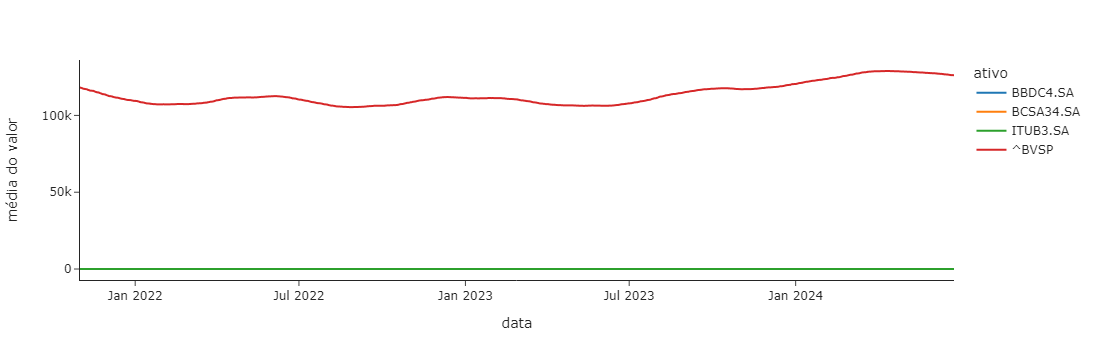

In [23]:
# Monte um gráfico de linhas para as médias móveis dos ativos da sua base
fig = px.line(media_dados_90, x="data", y="média do valor", color='ativo', template = "simple_white")
fig.show()

C:\Users\Matheus-Educar\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



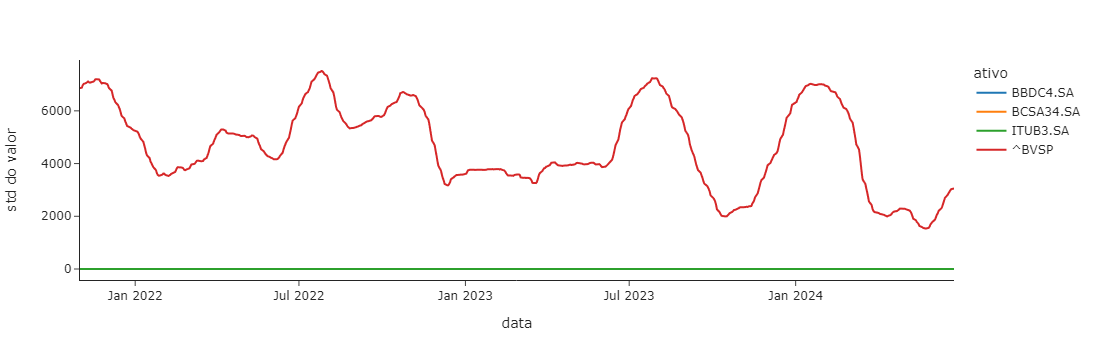

In [24]:
# Monte um gráfico de linhas para os desvios padrão em janela móvel
fig = px.line(std_dados_90, x="data", y="std do valor", color='ativo', template = "simple_white")
fig.show()

### Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.
 R: Os gráficos mostram que apesar da estabilidade média dos valores, há momentos de variação significativa nos preços dos ativos.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [9]:
# Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
lista_indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['ITUB3.SA']*len(lista_indicadores)
colunas = list(zip(lista_indicadores, ativo))
itu = df.loc['04/26/2024':,colunas]
itu.columns = lista_indicadores
print(itu.shape)
itu.head()

(40, 6)


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-04-26,28.023506,28.059999,28.120001,27.459999,27.750000,200600
2024-04-29,27.763844,27.799999,28.150000,27.559999,28.059999,238300
2024-04-30,27.284468,27.320000,27.969999,27.299999,27.799999,790500
2024-05-02,27.701845,27.719999,27.799999,27.379999,27.600000,412300
2024-05-03,27.971668,27.990000,28.219999,27.850000,27.920000,277200


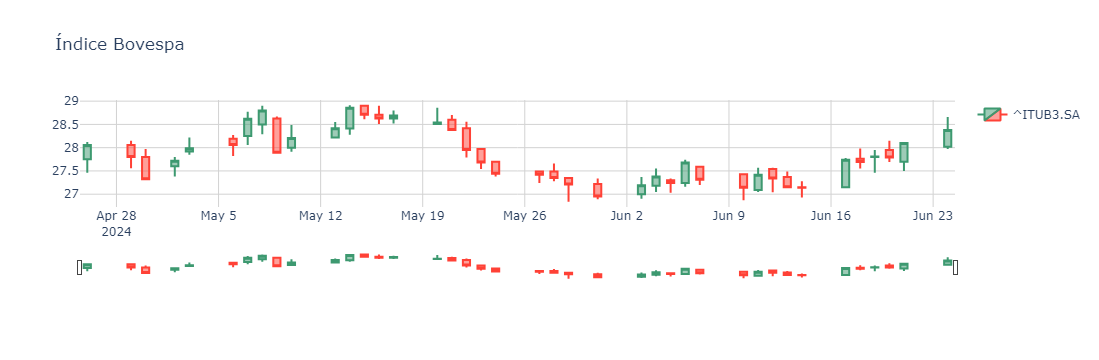

In [10]:
# Monte um gráfico de candlestick para esses dados.
graph = {
    'x': itu.index,
    'open': itu.Open,
    'close': itu.Close,
    'high': itu.High,
    'low': itu.Low,
    'type': 'candlestick',
    'name': '^ITUB3.SA',
    'showlegend': True
}

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [graph],
    layout_title="Índice Bovespa",
    layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico